In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv(r"C:\Users\91808\Downloads\EastWestAirlines.csv")
df

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [9]:
df.columns

Index(['ID#', 'Balance', 'Qual_miles', 'cc1_miles', 'cc2_miles', 'cc3_miles',
       'Bonus_miles', 'Bonus_trans', 'Flight_miles_12mo', 'Flight_trans_12',
       'Days_since_enroll', 'Award?'],
      dtype='object')

In [11]:
data=df.drop(columns=[ 'Award?','ID#'])
data

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
0,28143,0,1,1,1,174,1,0,0,7000
1,19244,0,1,1,1,215,2,0,0,6968
2,41354,0,1,1,1,4123,4,0,0,7034
3,14776,0,1,1,1,500,1,0,0,6952
4,97752,0,4,1,1,43300,26,2077,4,6935
...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403
3995,64385,0,1,1,1,981,5,0,0,1395
3996,73597,0,3,1,1,25447,8,0,0,1402
3997,54899,0,1,1,1,500,1,500,1,1401


In [13]:
data.isnull().sum()

Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
dtype: int64

In [14]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage
scaler = StandardScaler()
scaled_df = scaler.fit_transform(data)

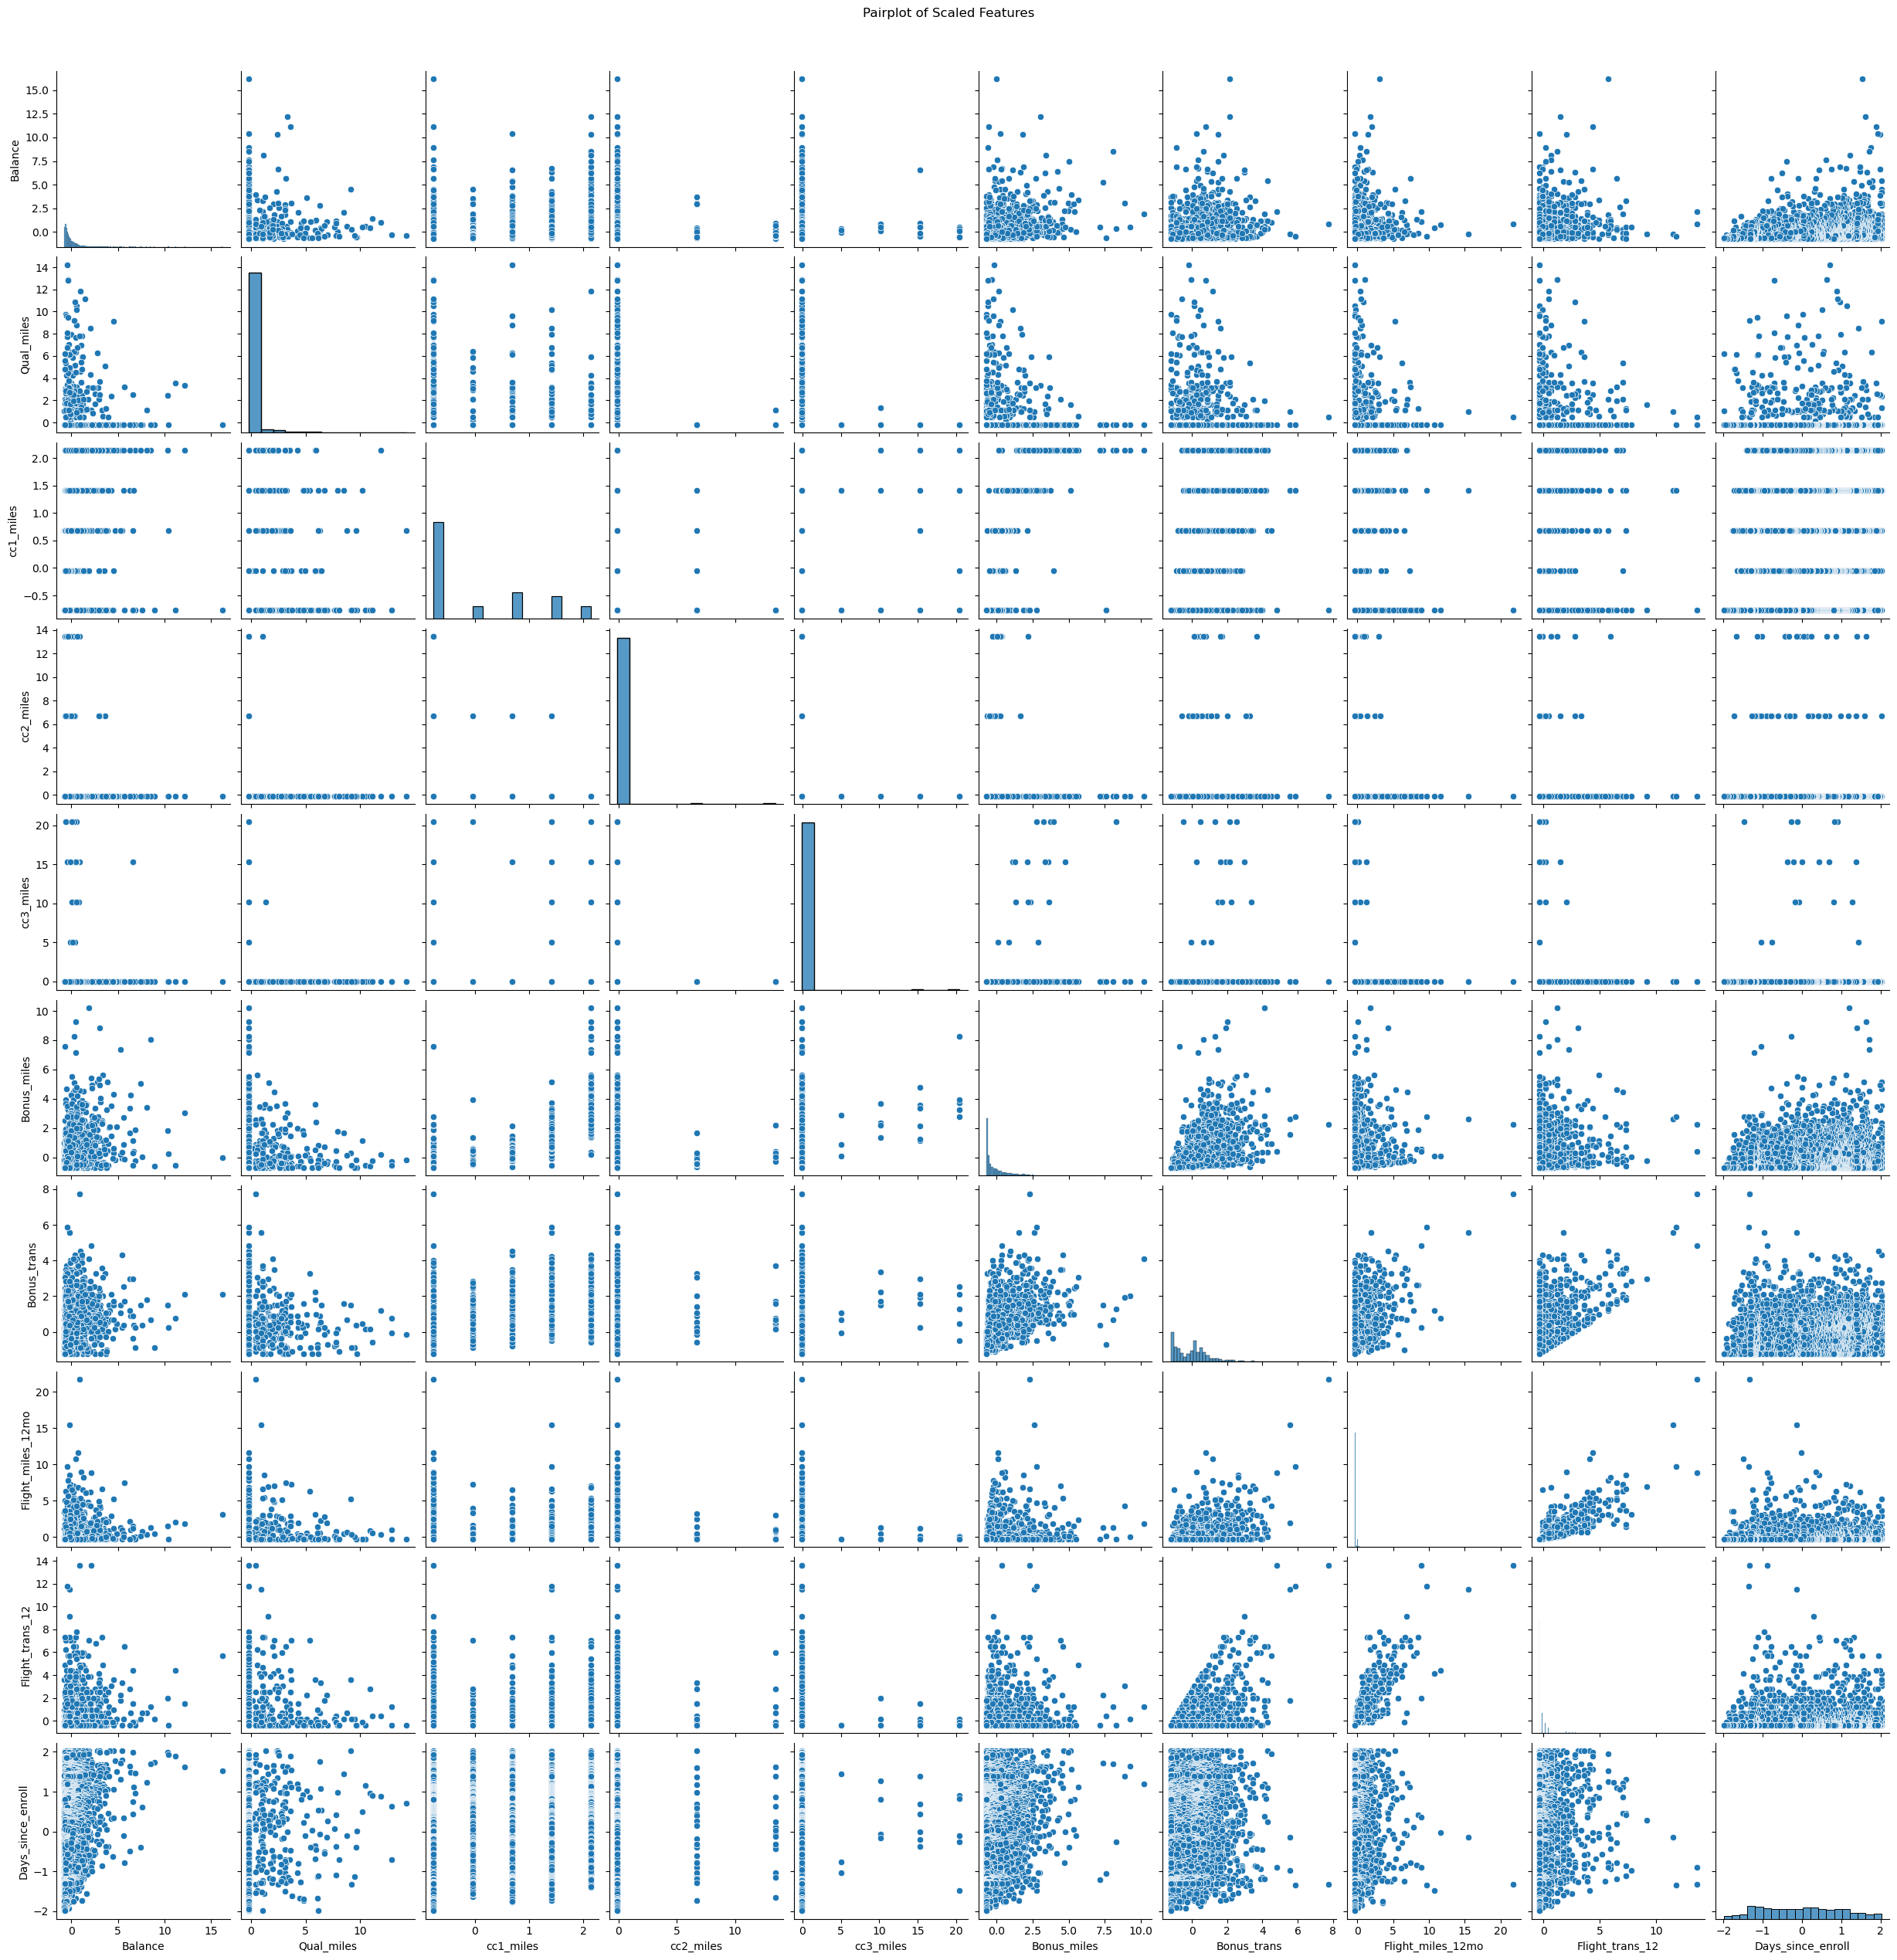

In [16]:
sns.pairplot(pd.DataFrame(scaled_df, columns=data.columns))
plt.suptitle("Pairplot of Scaled Features", y=1.02)
plt.show()


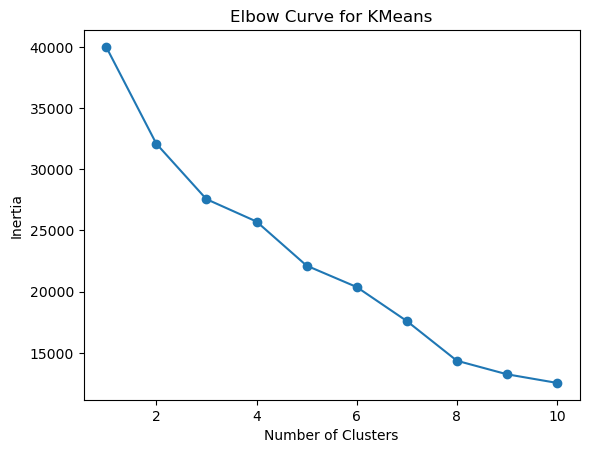

In [17]:
# K-MEANS CLUSTERING
inertia = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_df)
    inertia.append(kmeans.inertia_)

plt.plot(k_range, inertia, marker='o')
plt.title("Elbow Curve for KMeans")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.show()

In [18]:
optimal_k = 4  # choose based on elbow curve
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans_labels = kmeans.fit_predict(scaled_df)

#  Silhouette Score
print("KMeans Silhouette Score:", silhouette_score(scaled_df, kmeans_labels))


KMeans Silhouette Score: 0.2758185306810566


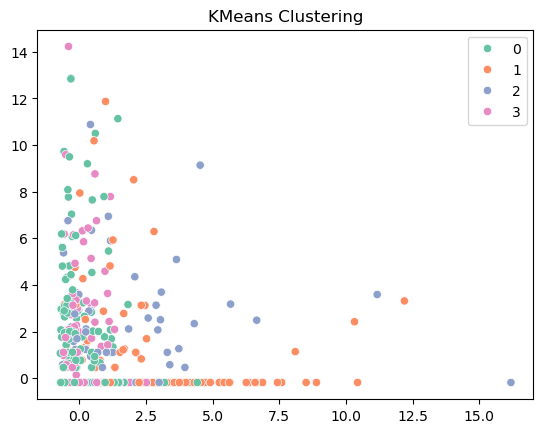

In [19]:
df['KMeans_Cluster'] = kmeans_labels

# 🖼️ Visualize clusters
sns.scatterplot(x=scaled_df[:, 0], y=scaled_df[:, 1], hue=kmeans_labels, palette='Set2')
plt.title("KMeans Clustering")
plt.show()


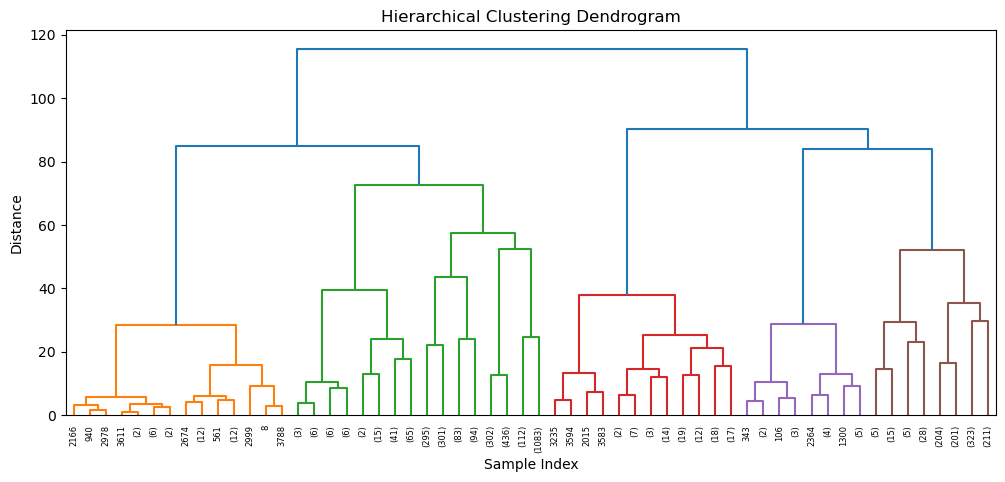

In [20]:
# HIERARCHICAL CLUSTERING
linked = linkage(scaled_df, method='ward')
plt.figure(figsize=(12, 5))
dendrogram(linked, truncate_mode='level', p=5)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Sample Index")
plt.ylabel("Distance")
plt.show()

Hierarchical Silhouette Score: 0.3350233247024554


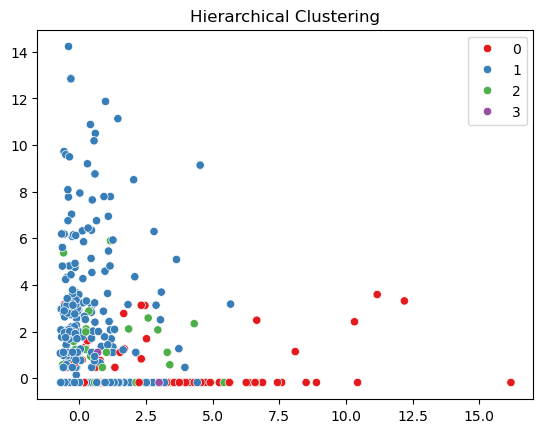

In [21]:
hc = AgglomerativeClustering(n_clusters=4, linkage='ward')
hc_labels = hc.fit_predict(scaled_df)
df['Hierarchical_Cluster'] = hc_labels

print("Hierarchical Silhouette Score:", silhouette_score(scaled_df, hc_labels))

sns.scatterplot(x=scaled_df[:, 0], y=scaled_df[:, 1], hue=hc_labels, palette='Set1')
plt.title("Hierarchical Clustering")
plt.show()

DBSCAN Silhouette Score: 0.5738140036508078


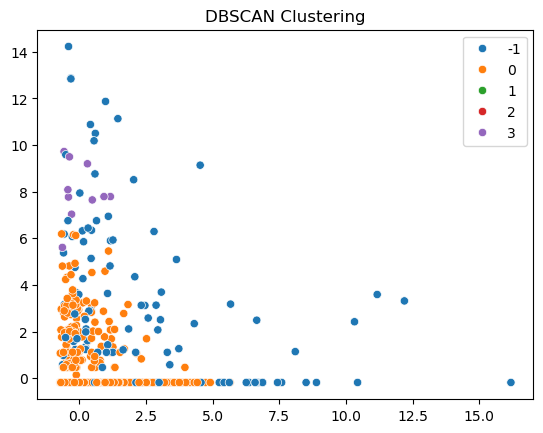

                        ID#        Balance  Qual_miles  cc1_miles  cc2_miles  \
KMeans_Cluster                                                                 
0               2274.760829   41036.097235  105.040092   1.052074   1.001843   
1               1309.194937  209849.103797  228.941772   4.541772   1.000000   
2               1787.809524  174854.884354  805.238095   2.034014   1.027211   
3               1819.030303   75127.672106  108.449883   2.999223   1.038850   

                cc3_miles   Bonus_miles  Bonus_trans  Flight_miles_12mo  \
KMeans_Cluster                                                            
0                1.000461   3252.112903     5.270046         219.603226   
1                1.121519  68360.784810    21.886076         559.913924   
2                1.000000  28572.034014    27.115646        5667.176871   
3                1.000000  23545.109557    17.349650         240.080031   

                Flight_trans_12  Days_since_enroll    Award?  \
KMea

In [22]:
#DBSCAN
dbscan = DBSCAN(eps=1.8, min_samples=5)
db_labels = dbscan.fit_predict(scaled_df)
df['DBSCAN_Cluster'] = db_labels

#  Evaluate (ignoring noise label -1)
if len(set(db_labels)) > 1:
    print("DBSCAN Silhouette Score:", silhouette_score(scaled_df, db_labels))
else:
    print("DBSCAN did not form enough clusters.")

# Visualize DBSCAN
sns.scatterplot(x=scaled_df[:, 0], y=scaled_df[:, 1], hue=db_labels, palette='tab10')
plt.title("DBSCAN Clustering")
plt.show()

print(df.groupby('KMeans_Cluster').mean())